In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('G:\\Business Analytics\\World Happiness Data 2021\\world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
data.shape

(149, 20)

##### We are taking specific columns

In [6]:
data_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data_columns

['Country name',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [7]:
data = data[data_columns].copy()

In [9]:
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


##### Renaming

In [21]:
happy_df = data.rename(columns={'Country name':'country_name' , 'Regional indicator':'regional_indicator' , 'Ladder score':'happiness_score' , 'Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'})

In [22]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [23]:
happy_df.isna().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [24]:
# Plot Between Hapiness and GDP

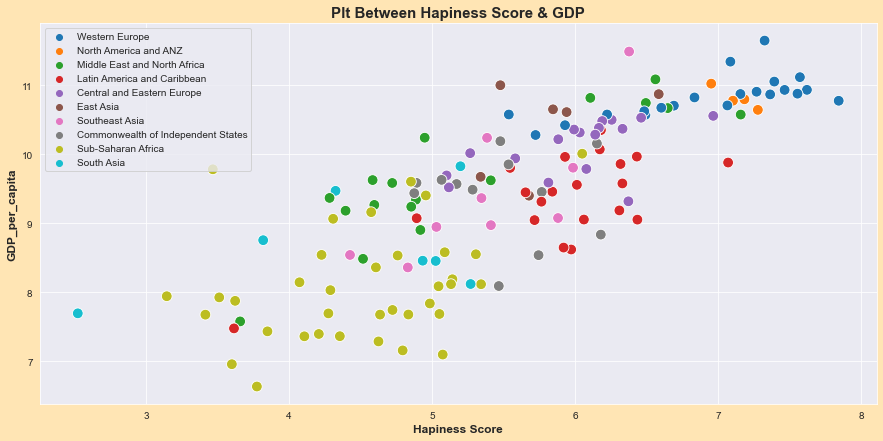

In [121]:
plt.figure(figsize=(15,7))
plt.title('Plt Between Hapiness Score & GDP' , fontweight = 'bold' , fontsize = 15)
sns.scatterplot(x = happy_df.happiness_score , y = happy_df.logged_GDP_per_capita , data=happy_df , hue=happy_df.regional_indicator , s = 115)
plt.legend(loc = 'upper left' , fontsize=10)
plt.xlabel('Hapiness Score' , fontsize=12 , fontweight='bold')
plt.ylabel('GDP_per_capita', fontsize=12 , fontweight='bold')
#sns.set_style('darkgrid')
plt.rcParams['figure.facecolor']='#FFE5B4'
plt.show()

In [69]:
# Pie Plot GDP by Region

In [112]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

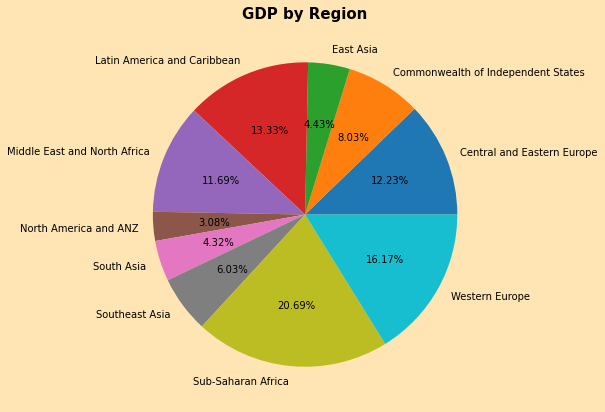

In [115]:
plt.figure(figsize=(15,7))
gdp_region.plot.pie(autopct='%.2f%%')
plt.ylabel("")
plt.title('GDP by Region' , fontsize = 15 , fontweight = 'bold')
plt.show()

In [125]:
# Total number of countries in each region

total_countries = happy_df.groupby('regional_indicator')['country_name'].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

##### Correlation Map

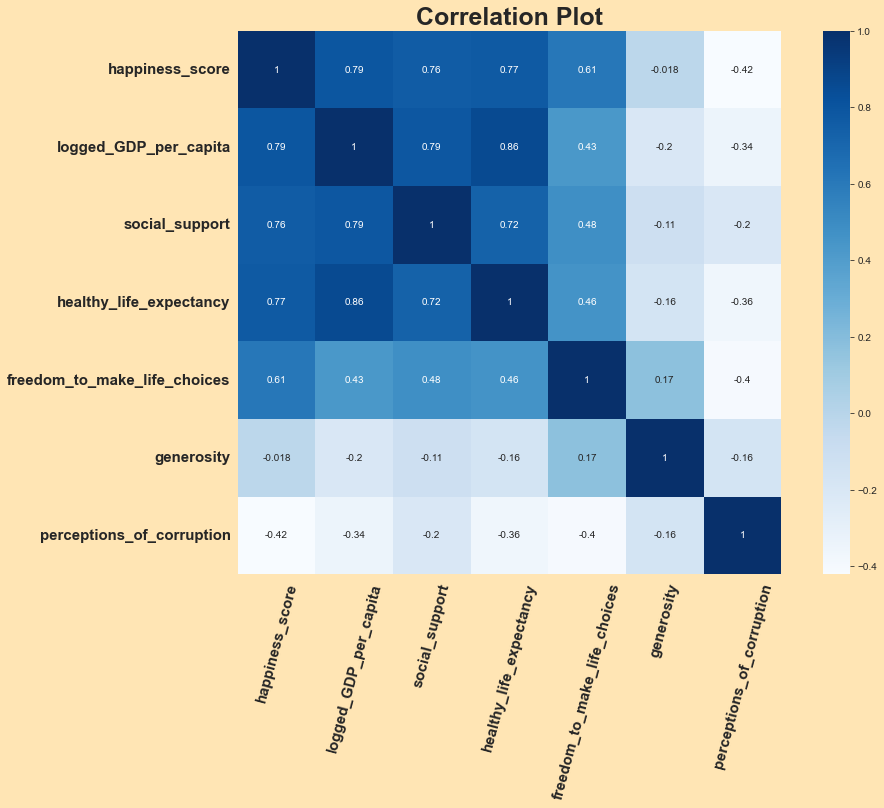

In [154]:
cor = happy_df.corr(method='pearson')
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='Blues' , square=True , ax=ax)
plt.xticks(rotation=75 , fontsize = 15 , fontweight='bold')
plt.yticks(fontsize = 15 , fontweight='bold')
plt.title('Correlation Plot',fontsize = 25 , fontweight='bold')
plt.show()

In [155]:
# Corruption in regions

In [178]:
corruptions = happy_df.groupby('regional_indicator')['perceptions_of_corruption'].mean()
corruptions

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perceptions_of_corruption, dtype: float64

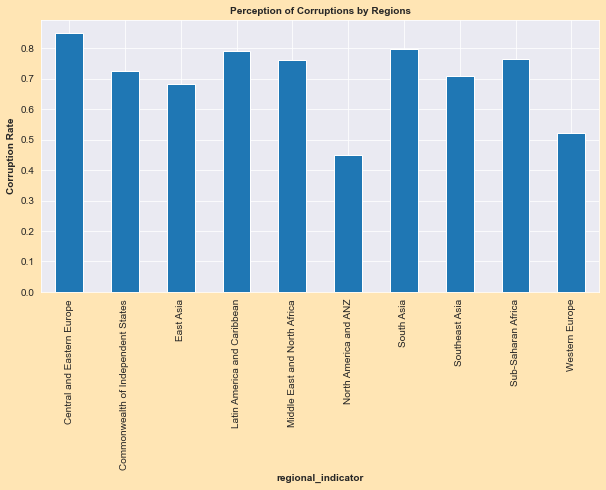

In [179]:
plt.figure(figsize=(10,5))
plt.title('Perception of Corruptions by Regions',fontsize=10,fontweight='bold')
plt.xlabel('Regions',fontsize=10,fontweight='bold')
plt.ylabel('Corruption Rate',fontsize=10,fontweight='bold')
corruptions.plot.bar()
plt.show()

In [180]:
# Life expentancy of top 10 countries

In [181]:
top10 = happy_df.head(10)
bottom10 = happy_df.tail(10)

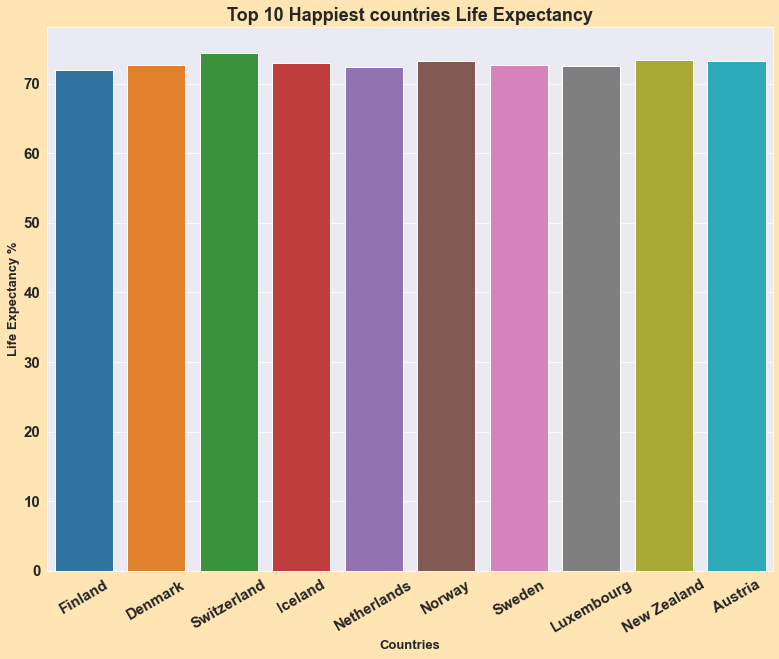

In [191]:
plt.figure(figsize=(13,10))
sns.barplot(x = happy_df['country_name'].head(10) , y = happy_df['healthy_life_expectancy'].head(10))
plt.title('Top 10 Happiest countries Life Expectancy',fontweight='bold',fontsize=18)
plt.xlabel('Countries',fontweight='bold',fontsize=13)
plt.ylabel('Life Expectancy %',fontweight='bold',fontsize=13)
plt.xticks(rotation=30,fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)
plt.show()

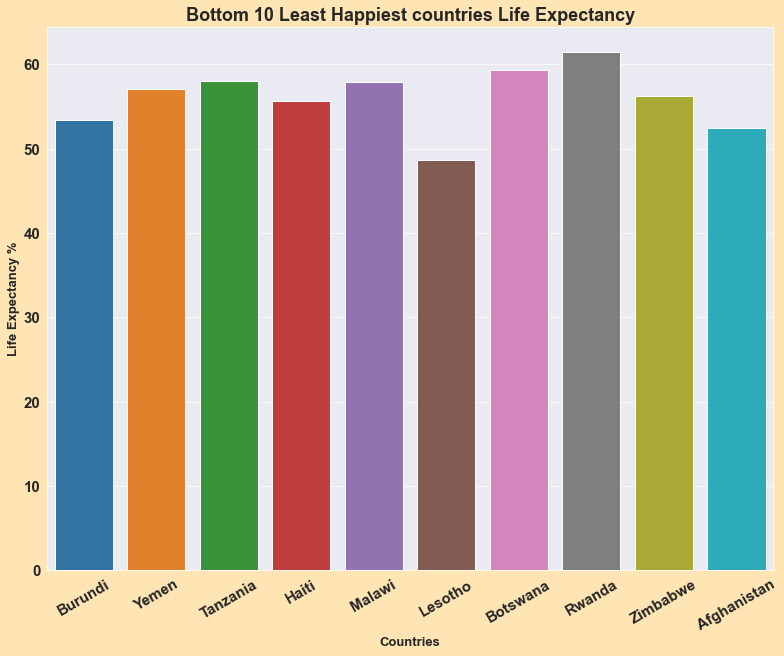

In [192]:
plt.figure(figsize=(13,10))
sns.barplot(x = happy_df['country_name'].tail(10) , y = happy_df['healthy_life_expectancy'].tail(10))
plt.title('Bottom 10 Least Happiest countries Life Expectancy',fontweight='bold',fontsize=18)
plt.xlabel('Countries',fontweight='bold',fontsize=13)
plt.ylabel('Life Expectancy %',fontweight='bold',fontsize=13)
plt.xticks(rotation=30,fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)
plt.show()

In [198]:
#Plot between Freedom to make life choices and Hapiness Score 

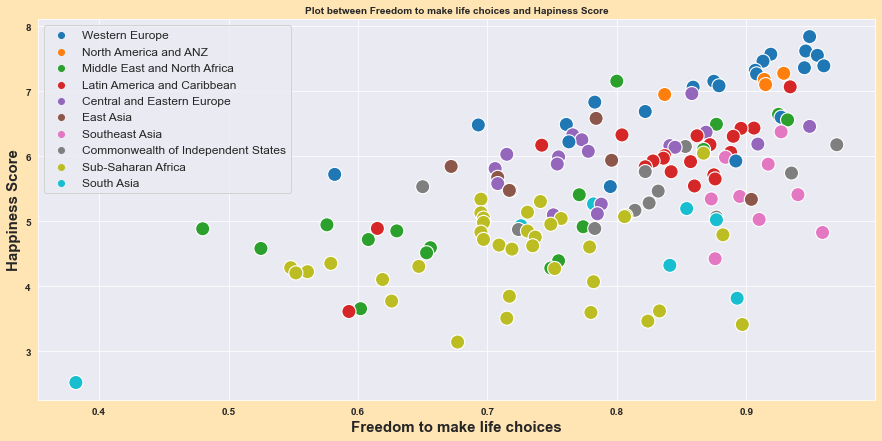

In [207]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = happy_df.freedom_to_make_life_choices , y = happy_df.happiness_score , hue=happy_df.regional_indicator, s=200)
plt.title('Plot between Freedom to make life choices and Hapiness Score' , fontsize=10,fontweight='bold')
plt.legend(loc='upper left' ,fontsize=12)
plt.xlabel('Freedom to make life choices' , fontsize=15,fontweight='bold')
plt.ylabel('Happiness Score' , fontsize=15,fontweight='bold')
plt.xticks( fontsize=10,fontweight='bold')
plt.yticks( fontsize=10,fontweight='bold')
plt.show()

In [208]:
# Top 10 Least corrupt countries

<BarContainer object of 10 artists>

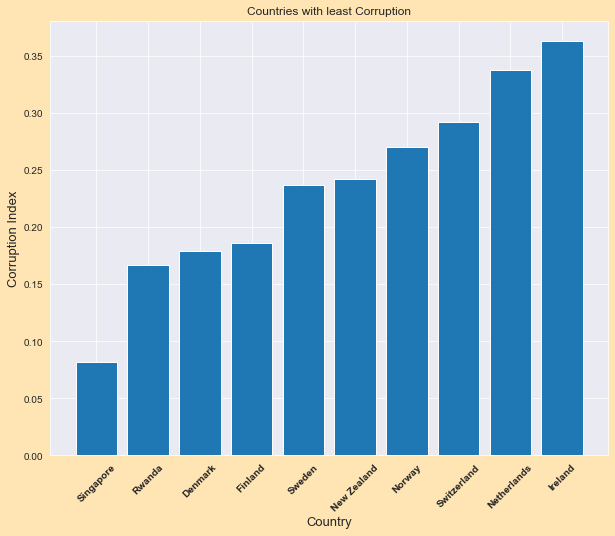

In [220]:
plt.figure(figsize=(10,8))
corrupt_countries = happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.title('Countries with least Corruption')
plt.xlabel('Country' , fontsize=13)
plt.ylabel('Corruption Index' , fontsize=13)
plt.xticks(rotation=45 , fontsize=10,fontweight='bold')
plt.bar(corrupt_countries.country_name , corrupt_countries.perceptions_of_corruption)

<BarContainer object of 10 artists>

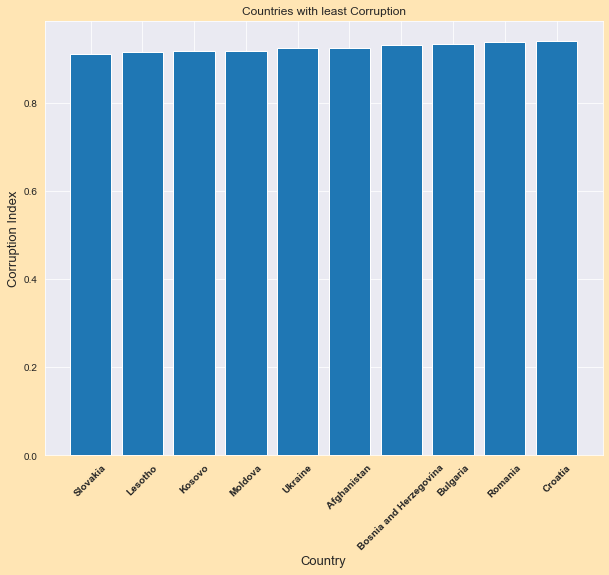

In [221]:
plt.figure(figsize=(10,8))
corrupt_countries = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.title('Countries with least Corruption')
plt.xlabel('Country' , fontsize=13)
plt.ylabel('Corruption Index' , fontsize=13)
plt.xticks(rotation=45 , fontsize=10,fontweight='bold')
plt.bar(corrupt_countries.country_name , corrupt_countries.perceptions_of_corruption)

In [222]:
# Scatter Plot Corruption and happiness score

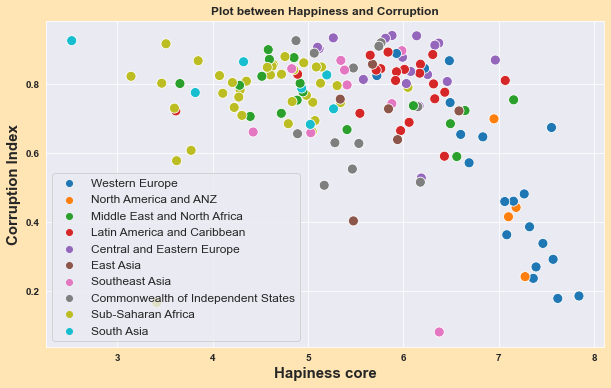

In [235]:
plt.figure(figsize=(10,6))
plt.title('Plot between Happiness and Corruption',fontweight='bold')
plt.xlabel('Hapiness core' , fontsize=15,fontweight='bold')
plt.ylabel('Corruption Index' , fontsize=15 , fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
sns.scatterplot(x=happy_df.happiness_score , y = happy_df.perceptions_of_corruption , hue = happy_df.regional_indicator,s=100)
plt.legend(loc='lower left' , fontsize=12)
plt.show()